# Toronto Parking Ticket Data Analysis from 2016 - 2022

## Author: Tilova Shahrin

### **Table of contents**

- Combining DataFrames
- Time and Date of infraction cleaning
- Histogram of infraction by Month
- Histogram of infraction by Time
- Histogram of infraction by Day 
- Top 5 infractions by count
- Location 1 cleaning
- Location 2 cleaning
- Total fines by year

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import os
import glob
import datetime

### Combining 2016 Data

In [2]:
#read the path
file_path_2016 = "../data/parking-tickets-2016"
#list all the files from the directory
file_list_2016 = os.listdir(file_path_2016)

In [3]:
df_2016 = pd.DataFrame()

# Append all files together
for file in file_list_2016:
    df_temp = pd.read_csv(f'../data/parking-tickets-2016/{file}')
    df_2016 = pd.concat([df_2016, df_temp], ignore_index=True)

### Combining 2017 Data

In [4]:
#read the path
file_path_2017 = "../data/parking-tickets-2017"
#list all the files from the directory
file_list_2017 = os.listdir(file_path_2017)

In [5]:
df_2017 = pd.DataFrame()

# Append all files together
for file in file_list_2017:
    df_temp = pd.read_csv(f'../data/parking-tickets-2017/{file}')
    df_2017 = pd.concat([df_2017, df_temp], ignore_index=True)

### Combining 2018 Data

In [6]:
#read the path
file_path_2018 = "../data/parking-tickets-2018"
#list all the files from the directory
file_list_2018 = os.listdir(file_path_2018)

In [7]:
df_2018 = pd.DataFrame()

# Append all files together
for file in file_list_2018:
    df_temp = pd.read_csv(f'../data/parking-tickets-2018/{file}')
    df_2018 = pd.concat([df_2018, df_temp], ignore_index=True)

### Combining 2019 Data

In [8]:
#read the path
file_path_2019 = "../data/parking-tickets-2019"
#list all the files from the directory
file_list_2019 = os.listdir(file_path_2019)

In [9]:
df_2019 = pd.DataFrame()

# Append all files together
for file in file_list_2019:
    df_temp = pd.read_csv(f'../data/parking-tickets-2019/{file}')
    df_2019 = pd.concat([df_2019, df_temp], ignore_index=True)

### Combining 2020 Data

In [10]:
#read the path
file_path_2020 = "../data/parking-tickets-2020"
#list all the files from the directory
file_list_2020 = os.listdir(file_path_2020)

In [11]:
df_2020 = pd.DataFrame()

# Append all files together
for file in file_list_2020:
    df_temp = pd.read_csv(f'../data/parking-tickets-2020/{file}')
    df_2020 = pd.concat([df_2020, df_temp], ignore_index=True)

### Combining 2021 Data

In [12]:
#read the path
file_path_2021 = "../data/parking-tickets-2021"
#list all the files from the directory
file_list_2021 = os.listdir(file_path_2021)

In [13]:
df_2021 = pd.DataFrame()

# Append all files together
for file in file_list_2021:
    df_temp = pd.read_csv(f'../data/parking-tickets-2021/{file}')
    df_2021 = pd.concat([df_2021, df_temp], ignore_index=True)

### Combining 2022 Data

In [14]:
#read the path
file_path_2022 = "../data/parking-tickets-2022"
#list all the files from the directory
file_list_2022 = os.listdir(file_path_2022)

In [15]:
df_2022 = pd.DataFrame()

# Append all files together
for file in file_list_2022:
    df_temp = pd.read_csv(f'../data/parking-tickets-2022/{file}')
    df_2022 = pd.concat([df_2022, df_temp], ignore_index=True)

### Merging Data Frames

In [16]:
frames = [df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]
df_merged = pd.concat(frames)

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13364473 entries, 0 to 1821886
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   tag_number_masked       object 
 1   date_of_infraction      int64  
 2   infraction_code         float64
 3   infraction_description  object 
 4   set_fine_amount         int64  
 5   time_of_infraction      float64
 6   location1               object 
 7   location2               object 
 8   location3               object 
 9   location4               object 
 10  province                object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


In [18]:
df_merged.shape

(13364473, 11)

#### Going to check what each column means, starting with `tag_number_masked`. Seems like they are the id number for each ticket made. Let's see if there are any unique values.

In [19]:
df_merged['tag_number_masked'].nunique()

100022

In [20]:
df_merged['tag_number_masked'].nunique()/df_merged.shape[0]*100

0.7484170905953418

#### There's 100k unique values of almost 13 million entries. Not sure how this column can help us, or what findings I may have, but it is best to leave it alone until I find out the best use for this column.

#### Next is `date_of_infraction`, we can change this to a datetime64[ns] format. But I noticed another column that gives me the time, `time_of_infraction` displayed in minutes. We can change both of these into datetime by combining them together into a new column. 

Checking for info or null values first. 

In [21]:
df_merged['date_of_infraction'].isna().sum()

0

We have no null values for `date_of_infraction` but we do for `time_of_infraction`. So once we combine them we will get 9337 null values. Let's get the average time for each day of the year and use that value to fill in the null values. Let's move on to changing its `dtype`.

In [22]:
df_merged['date_of_infraction'].head()

0    20161230
1    20161230
2    20161230
3    20161230
4    20161230
Name: date_of_infraction, dtype: int64

In [23]:
df_merged['date_of_infraction'] = pd.to_datetime(df_merged['date_of_infraction'], format='%Y%m%d')
df_merged['date_of_infraction'].head()

0   2016-12-30
1   2016-12-30
2   2016-12-30
3   2016-12-30
4   2016-12-30
Name: date_of_infraction, dtype: datetime64[ns]

In [24]:
df_merged['time_of_infraction'].head()

0    1637.0
1    1637.0
2    1637.0
3    1637.0
4    1637.0
Name: time_of_infraction, dtype: float64

In [25]:
(df_merged.isna().sum()/df_merged.shape[0])*100

tag_number_masked          0.000000
date_of_infraction         0.000000
infraction_code            0.000015
infraction_description     0.000000
set_fine_amount            0.000000
time_of_infraction         0.069864
location1                 10.416520
location2                  0.010094
location3                 92.684912
location4                 92.666168
province                   0.000022
dtype: float64

`time_of_infraction` only has 0.07% of missing data. So without needing to find a way to fill the data, we can remove them.

In [26]:
df_merged.dropna(subset=['time_of_infraction'],inplace=True)

In [27]:
df_merged['time_of_infraction'].isna().sum()

0

I cannot just change this by making unit into minutes, otherwise 1637 will give me a combination of minutes instead of separating hours and minutes into 16:37:00, 
let's do a format by breaking it down to hours and minutes.

In [28]:
df_merged['hours'] = df_merged['time_of_infraction'] // 100
df_merged['minutes'] = df_merged['time_of_infraction'] % 100

In [29]:
df_merged['hours'] = pd.to_timedelta(df_merged['hours'], unit='h')
df_merged['minutes'] = pd.to_timedelta(df_merged['minutes'], unit='m')

In [30]:
# Combine date and time columns into a single datetime column
df_merged['time_of_infraction'] = (df_merged['hours'] + df_merged['minutes']).astype(str)
df_merged['time_of_infraction'] = df_merged['time_of_infraction'].astype(str).str.split().str[-1]

In [31]:
df_merged['time_of_infraction']

0          16:37:00
1          16:37:00
2          16:37:00
3          16:37:00
4          16:37:00
             ...   
1821882    09:46:00
1821883    09:47:00
1821884    09:47:00
1821885    09:47:00
1821886    09:47:00
Name: time_of_infraction, Length: 13355136, dtype: object

#### Since I have date and time, I don't think I need a necessary datetime of both, so I shall leave that separate for now, unless necessary. 

In [32]:
df_merged['datetime_of_infraction']=pd.to_datetime(df_merged['date_of_infraction'].astype(str) +  df_merged['time_of_infraction'],format='%Y-%m-%d%H:%M:%S')
df_merged['datetime_of_infraction'].head()

0   2016-12-30 16:37:00
1   2016-12-30 16:37:00
2   2016-12-30 16:37:00
3   2016-12-30 16:37:00
4   2016-12-30 16:37:00
Name: datetime_of_infraction, dtype: datetime64[ns]

Now we can see this as its own column. Best to remove `hours` and `minutes` columns.

In [33]:
df_merged.drop(columns = ['hours', 'minutes', 'tag_number_masked'], inplace=True)

Now that I know there's NaT values to look out for and not the 0 times. I can fill the NaT values with the average of each offence. 

Let's look into `infraction_description` and group by that with NaT values.

In [34]:
df_merged['infraction_description'].nunique()

288

Let's get mean of each list. 

### Let's get the histogram of infraction date.

In [35]:
df_year_2022 = df_merged[df_merged['datetime_of_infraction'].dt.year == 2022]

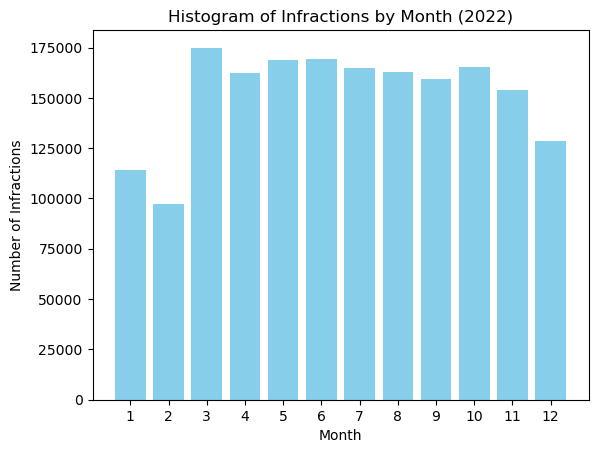

In [36]:
infraction_month = df_year_2022.groupby(df_year_2022['datetime_of_infraction'].dt.month).size()

# Plot histogram
plt.bar(infraction_month.index, infraction_month, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Infractions')
plt.title('Histogram of Infractions by Month (2022)')
plt.xticks(range(1, 13))  # Set ticks for all months
plt.show()

Looks like spring and summer gets the most tickets from March-July. There's a bounce in October, is it from holidays? We'll find out later through our analysis. 

### Let's get histogram of infraction time in 2022

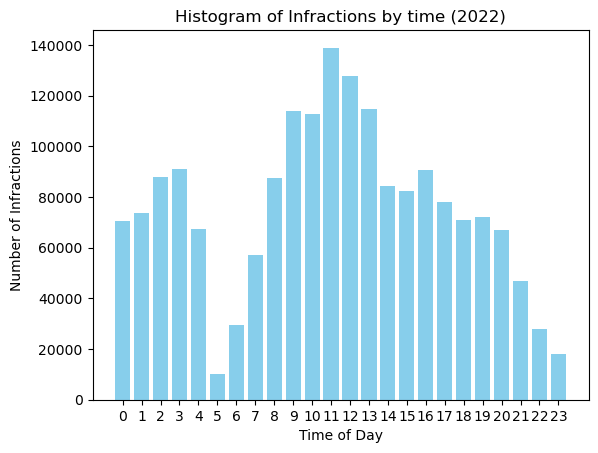

In [37]:
infraction_hour = df_year_2022.groupby(df_year_2022['datetime_of_infraction'].dt.hour).size()

# Plot histogram
plt.bar(infraction_hour.index, infraction_hour, color='skyblue')
plt.xlabel('Time of Day')
plt.ylabel('Number of Infractions')
plt.title('Histogram of Infractions by time (2022)')
plt.xticks(range(0,24))  # Set ticks for all months
plt.show()

Seems most tickets are received between 11 and 12 with a whopping 140k tickets issued around that time in total. 

In [38]:
#top 5 addresses and their violations
df_merged['location2'].value_counts().head(5)

location2
4700 KEELE ST          34744
2075 BAYVIEW AVE       31002
20 EDWARD ST           22372
15 MARINE PARADE DR    21727
4001 LESLIE ST         18511
Name: count, dtype: int64

In [39]:
#top 5 infractions by count
df_merged['infraction_description'].value_counts().head(5)

infraction_description
PARK ON PRIVATE PROPERTY          2619550
PARK-SIGNED HWY-PROHIBIT DY/TM    2114756
PARK PROHIBITED TIME NO PERMIT    1861173
PARK MACHINE-REQD FEE NOT PAID    1582575
STOP-SIGNED HWY-PROHIBIT TM/DY     694472
Name: count, dtype: int64

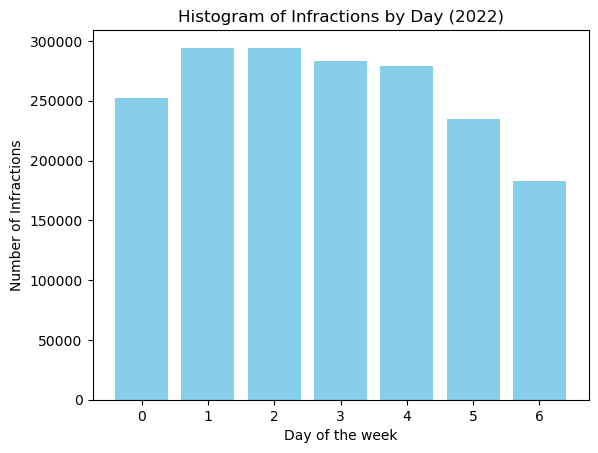

In [40]:
infraction_day = df_year_2022.groupby(df_year_2022['datetime_of_infraction'].dt.dayofweek).size()

# Plot histogram
plt.bar(infraction_day.index, infraction_day, color='skyblue')
plt.xlabel('Day of the week')
plt.ylabel('Number of Infractions')
plt.title('Histogram of Infractions by Day (2022)')
plt.xticks(range(0,7))
plt.show()

Looks like Tuesday gets the most tickets with Wednesday right after. 

In [41]:
df_merged.isna().sum()

date_of_infraction               0
infraction_code                  2
infraction_description           0
set_fine_amount                  0
time_of_infraction               0
location1                  1384301
location2                     1197
location3                 12377620
location4                 12375473
province                         3
datetime_of_infraction           0
dtype: int64

Let's fill na values, we know they're empty because it didn't need specification. To fill using one of the top value counts, let's fill with 'AT'. That way it is specified that it's address specified and there's no na values. 

In [42]:
df_merged['location1'].fillna('AT', inplace = True)

In [43]:
df_merged.isna().sum()

date_of_infraction               0
infraction_code                  2
infraction_description           0
set_fine_amount                  0
time_of_infraction               0
location1                        0
location2                     1197
location3                 12377620
location4                 12375473
province                         3
datetime_of_infraction           0
dtype: int64

In [44]:
df_merged['location1'].value_counts().head(20)

location1
NR          7408863
AT          3194754
OPP         1701014
E/S          253678
S/S          242604
N/S          234813
W/S          229300
R/O           63647
N/O            5289
S/O            4456
E/O            4173
NEAR           2811
W/O            2636
REAR            819
O/F             811
N/R             553
REAR OF         316
OPPOSITE        204
NS OF           136
N               109
Name: count, dtype: int64

Let's combine rear and rear of by replacing anything that starts with rear using regex. 

In [45]:
df_merged.loc[df_merged.iloc[:,5].str.contains(r'^REAR.+$', regex=True)]

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,datetime_of_infraction
123246,2016-09-14,312.0,PARKING MACH-NOT USED/NO FEE,30,17:48:00,REAR OF,5124 DUNDAS ST W,NaN,NaN,ON,2016-09-14 17:48:00
130982,2016-09-15,347.0,PARK IN A FIRE ROUTE,250,22:45:00,REAR OF,128 WILLOW AVE,NaN,NaN,ON,2016-09-15 22:45:00
205348,2016-09-27,312.0,PARKING MACH-NOT USED/NO FEE,30,19:21:00,REAR OF,2990 LAKE SHORE BLVD WEST,NaN,NaN,ON,2016-09-27 19:21:00
212956,2016-09-28,312.0,PARKING MACH-NOT USED/NO FEE,30,19:33:00,REAR OF,5124 DUNDAS ST W,NaN,NaN,ON,2016-09-28 19:33:00
212969,2016-09-28,312.0,PARKING MACH-NOT USED/NO FEE,30,19:36:00,REAR OF,5124 DUNDAS ST W,NaN,NaN,ON,2016-09-28 19:36:00
...,...,...,...,...,...,...,...,...,...,...,...
720918,2021-11-27,3.0,PARK ON PRIVATE PROPERTY,30,13:34:00,REAR OF,400 MCCOWAN RD,NaN,NaN,ON,2021-11-27 13:34:00
720931,2021-11-27,3.0,PARK ON PRIVATE PROPERTY,30,13:39:00,REAR OF,400 MCCOWAN RD,NaN,NaN,ON,2021-11-27 13:39:00
720953,2021-11-27,3.0,PARK ON PRIVATE PROPERTY,30,13:44:00,REAR OF,400 MCCOWAN ROAD,NaN,NaN,ON,2021-11-27 13:44:00
918993,2021-05-24,347.0,PARK IN A FIRE ROUTE,250,19:30:00,REAR OF,3400 EGLINTON AVE E,NaN,NaN,ON,2021-05-24 19:30:00


In [46]:
df_merged['location1'] = df_merged['location1'].str.replace(r'^REAR.+$', 'REAR', regex=True)

In [47]:
df_merged['location1'].value_counts().head(20)

location1
NR          7408863
AT          3194754
OPP         1701014
E/S          253678
S/S          242604
N/S          234813
W/S          229300
R/O           63647
N/O            5289
S/O            4456
E/O            4173
NEAR           2811
W/O            2636
REAR           1161
O/F             811
N/R             553
OPPOSITE        204
NS OF           136
N               109
RR              109
Name: count, dtype: int64

In [48]:
df_merged['location1'] = df_merged['location1'].str.replace(r'^OPP.+$', 'OPP', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^NS.+$', 'N/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^E/?S.*$', 'E/S', regex=True)

#df_merged['location1'] = df_merged['location1'].str.replace(r'^REAR*+$', 'R/O', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^WS.+$', 'W/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^ON$', 'AT', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^N.?$', 'N/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^N.+\sOF$', 'N/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^WS$', 'W/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^OP$', 'OPP', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^N/B$', 'N/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^E/B$', 'E/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^W/B$', 'W/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^S/?S.*$', 'S/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^N/R$', 'NEAR', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^.*AT.*$', 'AT', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^NEAR$', 'AT', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^ACROSS$', 'OPP', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^NEAR.?E/?B$', 'E/B', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^`$', 'AT', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^O(UT)? F(RONT)?$', 'AT', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^E/B$', 'E/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^S/B$', 'S/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^NR.+$', 'AT', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^.+W/B$', 'W/S', regex=True)

In [49]:
df_merged['location1'].value_counts().head(30)

location1
N/S           7644252
AT            3198577
OPP           1701419
E/S            253994
S/S            242804
W/S            229447
R/O             63647
N/O              5289
S/O              4456
E/O              4173
W/O              2636
REAR             1161
O/F               811
RR                109
OF                 91
I/F                74
2075               39
1                  33
BR                 32
UGTNTPRK           31
18                 30
4001               24
T                  24
AR                 22
2                  22
20                 20
1000               19
10                 18
9                  17
P1 VST PKG         17
Name: count, dtype: int64

In [50]:
#remove 0 from location 2 and merge any numbers from location 1 onto location 2 
#and set the value for location 1 to AT

df_merged[df_merged['location1'].str.contains(r'^[0-9]$', regex=True)]

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,datetime_of_infraction
156747,2016-09-20,3.0,PARK ON PRIVATE PROPERTY,30,09:50:00,1,1340 DANFORTH RD,NaN,NaN,PQ,2016-09-20 09:50:00
1183898,2016-07-05,3.0,PARK ON PRIVATE PROPERTY,30,00:50:00,1,120 TWENTY FORTH ST,NaN,NaN,ON,2016-07-05 00:50:00
1258451,2016-07-17,3.0,PARK ON PRIVATE PROPERTY,30,00:27:00,7,CRESCENT PL,NaN,NaN,ON,2016-07-17 00:27:00
1313015,2016-07-25,3.0,PARK ON PRIVATE PROPERTY,30,23:26:00,1,30 GILDER DR,NaN,NaN,ON,2016-07-25 23:26:00
1394295,2016-08-08,4.0,PARK ON MUNICIPAL PROPERTY,30,14:00:00,1,18 HENDON AVE,NaN,NaN,ON,2016-08-08 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1125493,2022-08-15,3.0,PARK ON PRIVATE PROPERTY,30,02:00:00,3,0 MEADOWGLEN PL,NaN,NaN,ON,2022-08-15 02:00:00
1307188,2022-09-19,3.0,PARK ON PRIVATE PROPERTY,30,02:05:00,3,0 MEADOWGLEN PL,NaN,NaN,ON,2022-09-19 02:05:00
1463749,2022-10-18,3.0,PARK ON PRIVATE PROPERTY,30,09:20:00,9,BOGERT AVENUE,NaN,NaN,ON,2022-10-18 09:20:00
1572442,2022-10-24,3.0,PARK ON PRIVATE PROPERTY,30,20:17:00,5,BELLEVUE GROVE,NaN,NaN,ON,2022-10-24 20:17:00


In [51]:
df_merged[df_merged['location2'].isna()]

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,datetime_of_infraction
13667,2016-08-28,3.0,PARK ON PRIVATE PROPERTY,30,05:56:00,AT,NaN,NaN,NaN,ON,2016-08-28 05:56:00
39798,2016-09-01,3.0,PARK ON PRIVATE PROPERTY,30,09:59:00,AT,NaN,NaN,NaN,ON,2016-09-01 09:59:00
46252,2016-09-02,3.0,PARK ON PRIVATE PROPERTY,30,03:42:00,AT,NaN,NaN,NaN,ON,2016-09-02 03:42:00
52533,2016-09-02,6.0,PARK-SIGNED HWY-EXC PERMT TIME,40,23:29:00,AT,NaN,NaN,NaN,ON,2016-09-02 23:29:00
63929,2016-09-05,8.0,STAND VEH.-PROHIBIT TIME/DAY,60,15:45:00,AT,NaN,NaN,NaN,ON,2016-09-05 15:45:00
...,...,...,...,...,...,...,...,...,...,...,...
1664833,2022-11-10,3.0,PARK ON PRIVATE PROPERTY,30,13:51:00,AT,NaN,NaN,NaN,ON,2022-11-10 13:51:00
1681044,2022-11-14,3.0,PARK ON PRIVATE PROPERTY,30,00:05:00,AT,NaN,NaN,NaN,ON,2022-11-14 00:05:00
1765660,2022-12-01,3.0,PARK ON PRIVATE PROPERTY,30,01:57:00,AT,NaN,NaN,NaN,ON,2022-12-01 01:57:00
1780322,2022-12-03,8.0,STAND VEH.-PROHIBIT TIME/DAY,100,18:43:00,AT,NaN,NaN,NaN,ON,2022-12-03 18:43:00


In [52]:
df_merged[df_merged['location2'].isna()].shape[0]/df_merged.shape[0]*100

0.008962843957560597

Very low percentage of rows with no address, so we can remove these rows. 

In [53]:
df_merged.dropna(subset=["location2"], inplace=True)

In [54]:
df_merged['location2'].isna().sum()

0

In [55]:
df_merged[df_merged['location2'].str.contains(r'^[0].+$', regex=True)]

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,datetime_of_infraction
86537,2016-09-09,2.0,PARK - LONGER THAN 3 HOURS,15,03:54:00,N/S,0 NORTH WOODROW BLVD,NaN,NaN,ON,2016-09-09 03:54:00
100494,2016-09-11,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,12:25:00,N/S,03 REAN DR,NaN,NaN,ON,2016-09-11 12:25:00
112190,2016-09-13,8.0,STAND VEH.-PROHIBIT TIME/DAY,60,10:30:00,N/S,0 PRINCE ARTHUR AVE,NaN,NaN,ON,2016-09-13 10:30:00
113109,2016-09-13,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,12:07:00,N/S,05 MARCELLINE CRES,NaN,NaN,ON,2016-09-13 12:07:00
113462,2016-09-13,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,12:41:00,N/S,03 REAN DR,NaN,NaN,ON,2016-09-13 12:41:00
...,...,...,...,...,...,...,...,...,...,...,...
1257917,2022-09-09,3.0,PARK ON PRIVATE PROPERTY,30,15:34:00,AT,00. HURON ST,NaN,NaN,ON,2022-09-09 15:34:00
1307188,2022-09-19,3.0,PARK ON PRIVATE PROPERTY,30,02:05:00,3,0 MEADOWGLEN PL,NaN,NaN,ON,2022-09-19 02:05:00
1427389,2022-10-11,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,14:07:00,N/S,0 THOMPSON ST,NaN,NaN,ON,2022-10-11 14:07:00
1502972,2022-12-12,3.0,PARK ON PRIVATE PROPERTY,30,20:15:00,AT,0 DRIFTWOOD AVE,NaN,NaN,ON,2022-12-12 20:15:00


In [56]:
df_merged['location2'] = df_merged['location2'].str.replace(r'^0+(.+)$', r'\1', regex=True)

In [57]:
df_merged[df_merged['location2'].str.contains(r'^[0].+$', regex=True)]

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,datetime_of_infraction


In [58]:
# num_in_location1 = df_merged['location1'].str.contains(r'^[0-9]+$', regex=True)
# filtered_df = df_merged[num_in_location1]  # Filter rows where 'location1' starts with a number

# df_merged.loc[num_in_location1, 'location2'] = df_merged['location1'].astype(str).str.cat(df_merged['location2'].astype(str), sep=' ')

# print(filtered_df)

In [59]:
df_year_2022 = df_merged[df_merged['date_of_infraction'].dt.year == 2022]

total_fine_2022 = df_year_2022['set_fine_amount'].sum()

In [60]:
total_fine_2022

96300530

In [61]:
df_merged.groupby(df_merged['date_of_infraction'].dt.year)['set_fine_amount'].mean()

date_of_infraction
2016    48.644683
2017    49.528544
2018    49.020389
2019    48.981233
2020    50.274798
2021    55.137215
2022    52.888231
Name: set_fine_amount, dtype: float64

This is the average fine given by infraction every year. It seems that the average fine went up by $3 after covid-19. 

In [62]:
df_merged.groupby(df_merged['date_of_infraction'].dt.year)['set_fine_amount'].sum()

date_of_infraction
2016    109601335
2017    106118125
2018    100129095
2019    108338405
2020     70498690
2021     81643880
2022     96300530
Name: set_fine_amount, dtype: int64

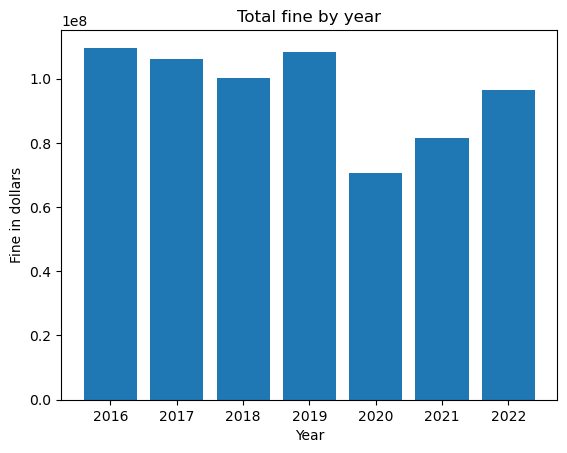

In [63]:
total_fine_yearly = df_merged.groupby(df_merged['date_of_infraction'].dt.year)['set_fine_amount'].sum()
plt.figure()
plt.bar(total_fine_yearly.index, total_fine_yearly)
plt.xlabel('Year')
plt.ylabel('Fine in dollars')
plt.title('Total fine by year')
plt.show()

Assuming the drop in 2020 is because of covid-19, it's only gone up by a little over the years because most people work remotely now and there were still some restrictions by 2022. 

In [64]:
(df_merged.isna().sum()/df_merged.shape[0])*100

date_of_infraction         0.000000
infraction_code            0.000015
infraction_description     0.000000
set_fine_amount            0.000000
time_of_infraction         0.000000
location1                  0.000000
location2                  0.000000
location3                 92.679965
location4                 92.663940
province                   0.000022
datetime_of_infraction     0.000000
dtype: float64

Moving onto location 1 proximity into address and coordinate. 

We're going to use this code snippet to change address to a coordinate. However, we have proximity codes from location 1 that specifies the area of which the address is pointed exactly. 

In [67]:
import pandas as pd
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="toronto-parking-application")
location = geolocator.geocode("Edward St Toronto ON Canada")
print(location.address)
print((location.latitude, location.longitude))

Edward Street, Discovery District, University—Rosedale, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5B 1R7, Canada
(43.6566007, -79.3831637)


Here is the proximity. 

In [68]:
df_merged['location1'].value_counts().head(20)

location1
N/S         7644220
AT          3197422
OPP         1701417
E/S          253994
S/S          242804
W/S          229447
R/O           63647
N/O            5289
S/O            4456
E/O            4173
W/O            2636
REAR           1161
O/F             808
RR              109
OF               90
I/F              74
2075             39
1                33
BR               32
UGTNTPRK         31
Name: count, dtype: int64

Here are the addresses. Some addresses don't have the building number! They're either not existant or they're applied in the `location1`. We don't want to work with separate columns to find coordinates. Let's combine these 4 columns (location1-location4) together and apply them onto the API. 

In [69]:
df_merged['location2'].value_counts().head(20)

location2
4700 KEELE ST          34744
2075 BAYVIEW AVE       31003
20 EDWARD ST           22372
15 MARINE PARADE DR    21727
4001 LESLIE ST         18511
1265 MILITARY TRL      17937
1 BRIMLEY RD S         16579
LA PLANTE AVE          16368
JAMES ST               15530
19 GRAND TRUNK CRES    15107
199 RICHMOND ST W      14796
103 THE QUEENSWAY      14390
EDWARD ST              13720
WELLINGTON ST W        12989
273 BLOOR ST W         12197
150 DAN LECKIE WAY     12068
150 GERRARD ST W       11719
2 COOPER ST            11512
2075 BAYVIEW AV        10865
1000 FINCH AVE W       10625
Name: count, dtype: int64

In [70]:
(df_merged['location2'].value_counts().cumsum()/df_merged['location2'].shape[0]*100).head(10000)

location2
4700 KEELE ST            0.260178
2075 BAYVIEW AVE         0.492342
20 EDWARD ST             0.659873
15 MARINE PARADE DR      0.822574
4001 LESLIE ST           0.961192
                          ...    
150 WOODINGTON AVE      61.506369
17 ALBANY AVE           61.507949
99 RONCESVALLES AVE     61.509529
389 RONCESVALLES AVE    61.511109
131 MOUNTJOY AVE        61.512689
Name: count, Length: 10000, dtype: float64

EDWARD ST has about 13720 entries, let's see what location1 say. 

In [71]:
df_merged[df_merged['location2']== 'EDWARD ST'].head(2)

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,datetime_of_infraction
772,2016-12-30,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,19:54:00,N/S,EDWARD ST,W/O,YONGE ST,NY,2016-12-30 19:54:00
781,2016-12-30,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,19:56:00,N/S,EDWARD ST,W/O,YONGE ST,ON,2016-12-30 19:56:00


In [72]:
df_merged.isna().sum()

date_of_infraction               0
infraction_code                  2
infraction_description           0
set_fine_amount                  0
time_of_infraction               0
location1                        0
location2                        0
location3                 12376426
location4                 12374286
province                         3
datetime_of_infraction           0
dtype: int64

Let's combine columns for location1 and location2 first and get it's coordinates. 

In [94]:
df_merged['location2'].str.lower().unique()

array(['1546 bloor st w', '5418 yonge st', '777 queen st w', ...,
       '28 lamberton blvd', '30151 glendale ave', '576 forman ave'],
      dtype=object)

In [101]:
from geopy.geocoders import Nominatim
import time
import json
from functools import lru_cache

@lru_cache(maxsize=None)
# Function to geocode address
def geocode_address(address):
    geolocator = Nominatim(user_agent="toronto-parking-application")
    location = geolocator.geocode(address, timeout=10)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None
    
# get the unique values of locations
unique_addresses = df_merged['location2'].str.lower().unique()

# create dict
try:
    with open('address_data.json', 'r') as json_file:
        address_dict = json.load(json_file)
except FileNotFoundError:
    # if the file does not exist, initialize an empty dictionary
    address_dict = {}
    
counter = 0 
# loop through addresses
for address in unique_addresses:
    # check if address is not already in the dictionary
    if address not in address_dict.keys():
        try:
            # add the address to the dictionary 
            address += ', toronto, on, canada'
            address_dict[address] = geocode_address(address)
            counter += 1

            # keep a counter, if counter at 100, save dict to json and counter to 0, otherwise increase counter
            if counter == 100:
                # Save the dictionary to a JSON file
                with open('address_data.json', 'w') as json_file:
                    json.dump(address_dict, json_file)

                # Reset the counter
                counter = 0

                #sleep for second 
                time.sleep(1)
        except Exception as e:
            print(f"An error occurred: {e}")
            print("Saving the collected data to a JSON file.")
            with open('address_data.json', 'w') as json_file:
                json.dump(address_dict, json_file)
            raise  

KeyboardInterrupt: 